# **Topic:** Quarter Back Sports Analytics (NFL)

## **Question:** Which Quarterback stats indicates most postseason success for NFL teams?

### **Group Members:** Gabriel Maayah, Leandro Zhang, Ellie Oh, Jewelle Tatad, Kane Yokoyama




In order to create a more focused and specific research question our group decided to focus on the main player of the sport, the quarterback. This is the most important position in Football and is what usually makes or breaks a team.

Some particular stats we will choose to focus on are percentage of NFL throws that were interceptions, percentage of NFL throws that were sacks, passing and rushing yards, completion percent,  total touchdowns, and individual player’s NFL QBR(Quarterback Rating).

To conduct this analysis we chose to work with a new dataset that includes an extensive quarterback database of all quarterbacks from 2000 to 2023, which includes actual real game stats from the 2000 to 2024 season. This dataset includes everything from a quarterback's physical attributes to all NFL statistics you could ask for. It also includes college stats, but for this project we strictly want to focus on the NFL. 

To ensure we only include QBs who have actually played a game we are only going to include players that have had at least 16 games played which is at least one full season where they were the starting quarterback.


Dataset:
https://www.kaggle.com/datasets/datadraco/nfl-quarterback-index?select=qb_index_no_tier.csv


In [131]:
import pandas as pd
import numpy as np

In [132]:
qbstats = pd.read_csv('qb_index_no_tier.csv')
nflqbstats = qbstats.copy()

columns_to_drop = [
    "college",
    "conf",
    "conf-str",
    "p-cmp",
    "p-att",
    "cmp-pct",
    "p-yds",
    "p-ypa",
    "p-adj-ypa",
    "p-td",
    "int",
    "rate",
    "r-att",
    "r-yds",
    "r-avg",
    "r-tds",
    "coach-tenure",
    "drafted-team-winpr",
    "drafted_team_ppg_rk",
    "qb-num-picked",
    "rd-picked",
    "num-picked",
    "year-drafted"

]

nflqbstats = qbstats.drop(columns=columns_to_drop)


Since our analysis focuses exclusively on NFL performance, we removed all college statistics and other variables that are not relevant to our study. And below is another filter we conducted that makes our dataset so it only includes QBs that have played as a starter for at least one full season worth of games.

In [133]:
realnflqbstats = realnflqbstats = nflqbstats[nflqbstats["nfl-starts"].fillna(0) >= 16]


pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

realnflqbstats

,name,height (in),weight (lbs),nfl-team,nfl-starts,nfl-wins,nfl-losses,nfl-ties,nfl-winpr,nfl-qbr,nfl-cmp,nfl-att,nfl-inc,nfl-comp%,nfl-yds,nfl-tds,nfl-int,nfl-pick6,nfl-int%,nfl-sack%,nfl-y/a,nfl-ay/a,nfl-any/a,nfl-y/c,nfl-y/g,nfl-succ%,nfl-4qc,nfl-gwd
0,Bryce Young,70,204,Panthers,16,2,14,0,0.13,73.7,315,527,212,59.8,2877,11,10,3,1.9,10.53,5.5,5.02,3.68,9.1,179.8,36.5,2,2
14,Kenny Pickett,75,217,Steelers,24,14,10,0,0.58,78.8,446,713,267,62.6,4474,13,13,0,1.8,6.55,6.3,5.82,4.97,10.0,179.0,42.3,6,7
15,Desmond Ridder,76,211,Falcons,17,8,9,0,0.47,84.1,322,503,181,64.0,3544,14,12,1,2.4,7.37,7.0,6.53,5.62,11.0,186.5,44.9,3,5
19,Sam Howell,73,221,Commanders,18,5,13,0,0.28,79.0,399,631,232,63.2,4115,22,22,4,3.5,9.73,6.5,5.65,4.44,10.3,228.6,42.2,2,2
20,Brock Purdy,73,212,49ers,21,17,4,0,0.81,111.4,422,614,192,68.7,5654,44,15,1,2.4,5.97,9.2,9.54,8.61,13.4,226.2,53.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,A.J. Feeley,75,220,Eagles,18,8,10,0,0.44,69.1,425,762,337,55.8,4618,28,31,6,4.1,5.46,6.1,4.96,4.35,10.9,164.9,39.8,3,5
280,Chad Pennington,75,229,Jets,81,44,37,0,0.54,90.1,1632,2471,839,66.0,17823,102,64,6,2.6,6.15,7.2,6.87,6.08,10.9,200.3,48.1,7,10
284,Marc Bulger,74,208,Saints,95,41,54,0,0.43,84.4,1969,3171,1202,62.1,22814,122,93,10,2.9,7.42,7.2,6.64,5.61,11.6,237.6,45.3,12,16
286,Tom Brady,76,211,Patriots,333,251,82,0,0.75,97.2,7753,12050,4297,64.3,89214,649,212,18,1.8,4.48,7.4,7.69,7.06,11.5,266.3,49.6,46,58


In [134]:


playoff_data = [
    {"name": "Bryce Young",        "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Kenny Pickett",      "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Desmond Ridder",     "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Sam Howell",         "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Brock Purdy",        "playoff_wins": 4,  "superbowl_wins": 0},
    {"name": "Trevor Lawrence",    "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Zach Wilson",        "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Justin Fields",      "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Mac Jones",          "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Davis Mills",        "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Joe Burrow",         "playoff_wins": 5,  "superbowl_wins": 0},
    {"name": "Tua Tagovailoa",     "playoff_wins": 2,  "superbowl_wins": 0},
    {"name": "Justin Herbert",     "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Jordan Love",        "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Jalen Hurts",        "playoff_wins": 6,  "superbowl_wins": 1},
    {"name": "Kyler Murray",       "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Daniel Jones",       "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Drew Lock",          "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Baker Mayfield",     "playoff_wins": 2,  "superbowl_wins": 0},
    {"name": "Sam Darnold",        "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Josh Allen",         "playoff_wins": 8,  "superbowl_wins": 0},
    {"name": "Josh Rosen",         "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Lamar Jackson",      "playoff_wins": 3,  "superbowl_wins": 0},
    {"name": "Mitchell Trubisky",  "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Patrick Mahomes",    "playoff_wins": 17, "superbowl_wins": 3},
    {"name": "Deshaun Watson",     "playoff_wins": 2,  "superbowl_wins": 0},
    {"name": "Jared Goff",         "playoff_wins": 4,  "superbowl_wins": 0},
    {"name": "Carson Wentz",       "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Jacoby Brissett",    "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Dak Prescott",       "playoff_wins": 2,  "superbowl_wins": 0},
    {"name": "Jameis Winston",     "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Marcus Mariota",     "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Trevor Siemian",     "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Blake Bortles",      "playoff_wins": 3,  "superbowl_wins": 0},
    {"name": "Teddy Bridgewater",  "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Derek Carr",         "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Jimmy Garoppolo",    "playoff_wins": 4,  "superbowl_wins": 0},
    {"name": "EJ Manuel",          "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Geno Smith",         "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Mike Glennon",       "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Andrew Luck",        "playoff_wins": 3,  "superbowl_wins": 0},
    {"name": "Ryan Tannehill",     "playoff_wins": 2,  "superbowl_wins": 0},
    {"name": "Brandon Weeden",     "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Brock Osweiler",     "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Russell Wilson",     "playoff_wins": 9,  "superbowl_wins": 1},
    {"name": "Nick Foles",         "playoff_wins": 3,  "superbowl_wins": 1},
    {"name": "Kirk Cousins",       "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Cam Newton",         "playoff_wins": 3,  "superbowl_wins": 0},
    {"name": "Jake Locker",        "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Blaine Gabbert",     "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Christian Ponder",   "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Andy Dalton",        "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Colin Kaepernick",   "playoff_wins": 3,  "superbowl_wins": 0},
    {"name": "Tyrod Taylor",       "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Sam Bradford",       "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Tim Tebow",          "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Colt McCoy",         "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "John Skelton",       "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Matthew Stafford",   "playoff_wins": 4,  "superbowl_wins": 1},
    {"name": "Mark Sanchez",       "playoff_wins": 4,  "superbowl_wins": 0},
    {"name": "Josh Freeman",       "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Matt Ryan",          "playoff_wins": 2,  "superbowl_wins": 0},
    {"name": "Joe Flacco",         "playoff_wins": 10, "superbowl_wins": 1},
    {"name": "Chad Henne",         "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Tom Brady",          "playoff_wins": 35, "superbowl_wins": 7},
    {"name": "Drew Brees",         "playoff_wins": 9,  "superbowl_wins": 1},
    {"name": "Aaron Rodgers",      "playoff_wins": 12, "superbowl_wins": 1},
    {"name": "Philip Rivers",      "playoff_wins": 9,  "superbowl_wins": 0},
    {"name": "Eli Manning",        "playoff_wins": 8,  "superbowl_wins": 2},
    {"name": "Ben Roethlisberger", "playoff_wins": 13, "superbowl_wins": 2},
    {"name": "Alex Smith",         "playoff_wins": 5,  "superbowl_wins": 0},
    {"name": "Matt Schaub",        "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Michael Vick",       "playoff_wins": 2,  "superbowl_wins": 0},
    {"name": "Jay Cutler",         "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Carson Palmer",      "playoff_wins": 3,  "superbowl_wins": 0},
    {"name": "Matt Cassel",        "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Ryan Fitzpatrick",   "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Chad Pennington",    "playoff_wins": 2,  "superbowl_wins": 0},
    {"name": "Vince Young",        "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "David Garrard",      "playoff_wins": 2,  "superbowl_wins": 0},
]

df_playoffs = pd.DataFrame(playoff_data)

realnflqbstats = realnflqbstats.merge(
    df_playoffs[["name", "playoff_wins", "superbowl_wins"]],
    on="name",
    how="left"
)

realnflqbstats["playoff_wins"]   = realnflqbstats["playoff_wins"].fillna(0).astype(int)
realnflqbstats["superbowl_wins"] = realnflqbstats["superbowl_wins"].fillna(0).astype(int)

In [135]:
realnflqbstats

,name,height (in),weight (lbs),nfl-team,nfl-starts,nfl-wins,nfl-losses,nfl-ties,nfl-winpr,nfl-qbr,nfl-cmp,nfl-att,nfl-inc,nfl-comp%,nfl-yds,nfl-tds,nfl-int,nfl-pick6,nfl-int%,nfl-sack%,nfl-y/a,nfl-ay/a,nfl-any/a,nfl-y/c,nfl-y/g,nfl-succ%,nfl-4qc,nfl-gwd,playoff_wins,superbowl_wins
0,Bryce Young,70,204,Panthers,16,2,14,0,0.13,73.7,315,527,212,59.8,2877,11,10,3,1.9,10.53,5.5,5.02,3.68,9.1,179.8,36.5,2,2,0,0
1,Kenny Pickett,75,217,Steelers,24,14,10,0,0.58,78.8,446,713,267,62.6,4474,13,13,0,1.8,6.55,6.3,5.82,4.97,10.0,179.0,42.3,6,7,0,0
2,Desmond Ridder,76,211,Falcons,17,8,9,0,0.47,84.1,322,503,181,64.0,3544,14,12,1,2.4,7.37,7.0,6.53,5.62,11.0,186.5,44.9,3,5,0,0
3,Sam Howell,73,221,Commanders,18,5,13,0,0.28,79.0,399,631,232,63.2,4115,22,22,4,3.5,9.73,6.5,5.65,4.44,10.3,228.6,42.2,2,2,0,0
4,Brock Purdy,73,212,49ers,21,17,4,0,0.81,111.4,422,614,192,68.7,5654,44,15,1,2.4,5.97,9.2,9.54,8.61,13.4,226.2,53.4,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,A.J. Feeley,75,220,Eagles,18,8,10,0,0.44,69.1,425,762,337,55.8,4618,28,31,6,4.1,5.46,6.1,4.96,4.35,10.9,164.9,39.8,3,5,0,0
104,Chad Pennington,75,229,Jets,81,44,37,0,0.54,90.1,1632,2471,839,66.0,17823,102,64,6,2.6,6.15,7.2,6.87,6.08,10.9,200.3,48.1,7,10,2,0
105,Marc Bulger,74,208,Saints,95,41,54,0,0.43,84.4,1969,3171,1202,62.1,22814,122,93,10,2.9,7.42,7.2,6.64,5.61,11.6,237.6,45.3,12,16,0,0
106,Tom Brady,76,211,Patriots,333,251,82,0,0.75,97.2,7753,12050,4297,64.3,89214,649,212,18,1.8,4.48,7.4,7.69,7.06,11.5,266.3,49.6,46,58,35,7


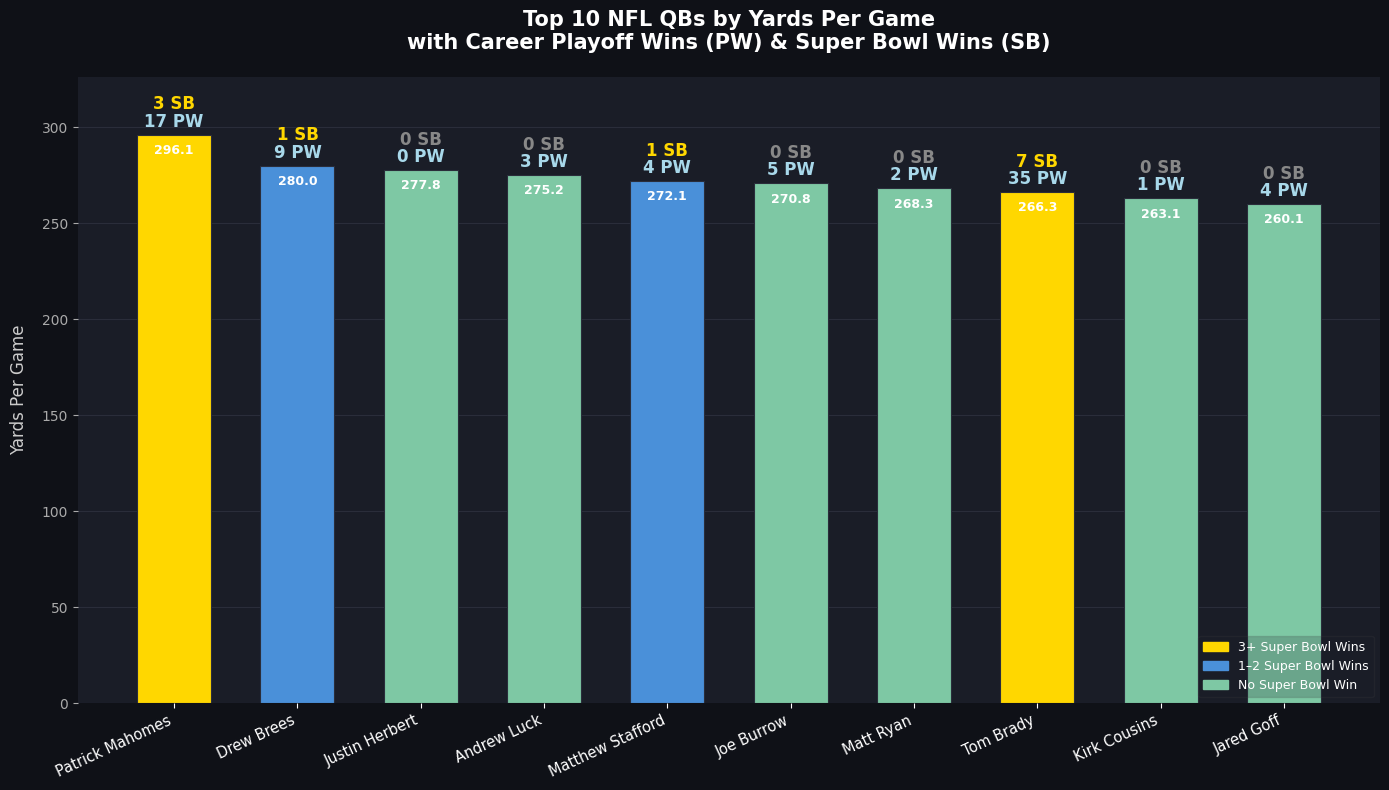

Saved!


In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

top10 = realnflqbstats.nlargest(10, "nfl-y/g").reset_index(drop=True)

names       = top10["name"].tolist()
ypg         = top10["nfl-y/g"].tolist()
pw          = top10["playoff_wins"].tolist()
sb          = top10["superbowl_wins"].tolist()

def bar_color(sb_wins):
    if sb_wins >= 3:   return "#FFD700" 
    elif sb_wins >= 1: return "#4A90D9"
    else:              return "#7EC8A4" 

colors = [bar_color(s) for s in sb]

fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor("#0F1117")
ax.set_facecolor("#1A1D27")

x = np.arange(len(names))
bars = ax.bar(x, ypg, color=colors, width=0.6, zorder=3, edgecolor="#2A2D3A", linewidth=0.8)

for i, (bar, p, s, y) in enumerate(zip(bars, pw, sb, ypg)):
    bar_top = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_top + 2,
        f"{p} PW",
        ha="center", va="bottom",
        fontsize=12, fontweight="bold",
        color="#A8D8EA"
    )
    sb_label = f"{s} SB" if s > 0 else "0 SB"
    sb_color = "#FFD700" if s > 0 else "#888888"
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_top + 11,
        sb_label,
        ha="center", va="bottom",
        fontsize=12, fontweight="bold",
        color=sb_color
    )
    # Y/G value inside bar
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_top - 5,
        f"{y:.1f}",
        ha="center", va="top",
        fontsize=9, fontweight="bold",
        color="white"
    )

ax.set_xticks(x)
ax.set_xticklabels(names, rotation=25, ha="right", fontsize=10.5, color="white")
ax.set_ylabel("Yards Per Game", fontsize=12, color="#CCCCCC", labelpad=10)
ax.set_title("Top 10 NFL QBs by Yards Per Game\nwith Career Playoff Wins (PW) & Super Bowl Wins (SB)",
             fontsize=15, fontweight="bold", color="white", pad=20)

ax.tick_params(axis="y", colors="#AAAAAA")
ax.tick_params(axis="x", colors="white")
ax.spines[["top", "right", "left", "bottom"]].set_visible(False)
ax.yaxis.grid(True, color="#2A2D3A", linewidth=0.8, zorder=0)
ax.set_axisbelow(True)

ymax = max(ypg) + 30
ax.set_ylim(0, ymax)

#legend
legend_patches = [
    mpatches.Patch(color="#FFD700", label="3+ Super Bowl Wins"),
    mpatches.Patch(color="#4A90D9", label="1–2 Super Bowl Wins"),
    mpatches.Patch(color="#7EC8A4", label="No Super Bowl Win"),
]
ax.legend(handles=legend_patches, loc="lower right", framealpha=0.2,
          labelcolor="white", fontsize=9, facecolor="#1A1D27", edgecolor="#444444")

plt.tight_layout()
plt.savefig("qb_yards_per_game_top10.png", dpi=150, bbox_inches="tight",
            facecolor=fig.get_facecolor())
plt.show()
print("Saved!")

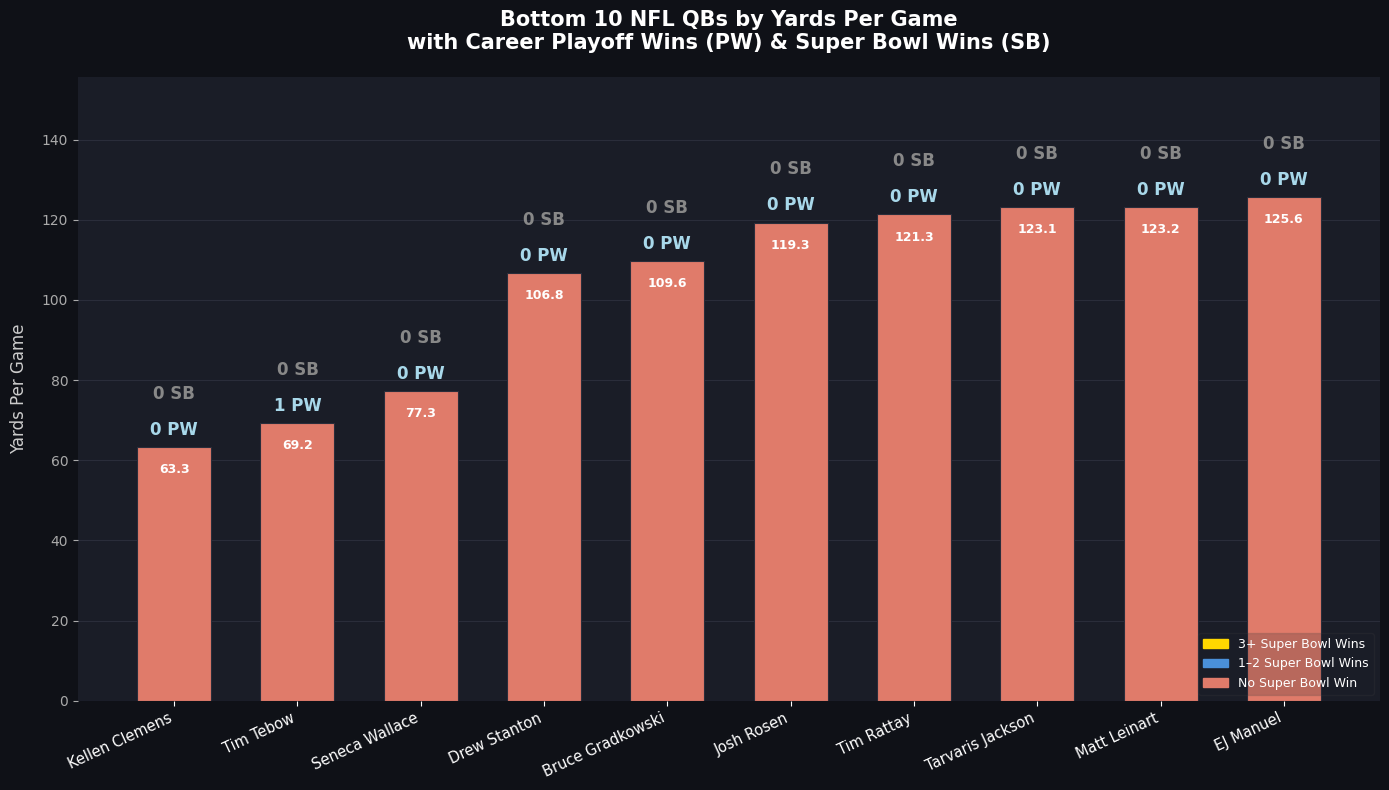

Saved!


In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

bottom10 = realnflqbstats.nsmallest(10, "nfl-y/g").reset_index(drop=True)

names = bottom10["name"].tolist()
ypg   = bottom10["nfl-y/g"].tolist()
pw    = bottom10["playoff_wins"].tolist()
sb    = bottom10["superbowl_wins"].tolist()

def bar_color(sb_wins):
    if sb_wins >= 3:   return "#FFD700"
    elif sb_wins >= 1: return "#4A90D9"
    else:              return "#E07B6A" 

colors = [bar_color(s) for s in sb]

fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor("#0F1117")
ax.set_facecolor("#1A1D27")

x = np.arange(len(names))
bars = ax.bar(x, ypg, color=colors, width=0.6, zorder=3, edgecolor="#2A2D3A", linewidth=0.8)

for i, (bar, p, s, y) in enumerate(zip(bars, pw, sb, ypg)):
    bar_top = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_top + 2,
        f"{p} PW",
        ha="center", va="bottom",
        fontsize=12, fontweight="bold",
        color="#A8D8EA"
    )
    sb_label = f"{s} SB" if s > 0 else "0 SB"
    sb_color = "#FFD700" if s > 0 else "#888888"
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_top + 11,
        sb_label,
        ha="center", va="bottom",
        fontsize=12, fontweight="bold",
        color=sb_color
    )
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_top - 4,
        f"{y:.1f}",
        ha="center", va="top",
        fontsize=9, fontweight="bold",
        color="white"
    )

ax.set_xticks(x)
ax.set_xticklabels(names, rotation=25, ha="right", fontsize=10.5, color="white")
ax.set_ylabel("Yards Per Game", fontsize=12, color="#CCCCCC", labelpad=10)
ax.set_title("Bottom 10 NFL QBs by Yards Per Game\nwith Career Playoff Wins (PW) & Super Bowl Wins (SB)",
             fontsize=15, fontweight="bold", color="white", pad=20)

ax.tick_params(axis="y", colors="#AAAAAA")
ax.tick_params(axis="x", colors="white")
ax.spines[["top", "right", "left", "bottom"]].set_visible(False)
ax.yaxis.grid(True, color="#2A2D3A", linewidth=0.8, zorder=0)
ax.set_axisbelow(True)

ymax = max(ypg) + 30
ax.set_ylim(0, ymax)

legend_patches = [
    mpatches.Patch(color="#FFD700", label="3+ Super Bowl Wins"),
    mpatches.Patch(color="#4A90D9", label="1–2 Super Bowl Wins"),
    mpatches.Patch(color="#E07B6A", label="No Super Bowl Win"),
]
ax.legend(handles=legend_patches, loc="lower right", framealpha=0.2,
          labelcolor="white", fontsize=9, facecolor="#1A1D27", edgecolor="#444444")

plt.tight_layout()
plt.savefig("qb_yards_per_game_bottom10.png", dpi=150, bbox_inches="tight",
            facecolor=fig.get_facecolor())
plt.show()
print("Saved!")

As you can see there is a huge difference between these two groups of quarterbacks. On one hand we have a group of the top ten hihgest passing yard QBs per game against the bottom ten passing yard QBs per game and the difference is overwhelmingly clear, as it shows more passing yards leads to much better playoff runs as the all the bottom ten NFL QBs in passing yards in our dataset have a combined playoff win of just 1.

Our purpose of showing this is to is to illustrate how statistical data can reveal meaningful insightsand why our question to find which stats are the largest indicators will prove to be a both challenging and feasible goal of ours.